# Capstone Final Project - Battle of the Neighborhoods

### Applied Data Science Capstone IBM/Coursera Course

## Table of Contents

 * [Introduction](#introduction)
 * [Data](#data)
 * [Methods](#methods)
 * [Results](#analysis)
 * [Discussion](#discussion)
 * [Conclusion](#conclusion)

# 1. Introduction <a name="introduction"></a>
   
## 1.1 Problem Statement
   #### The purpose of this project is to answer the age-old question that has plagued city-dwellers for generations: Which city is better, San Francisco or New York City? Despite both cities being on opposite sides of the country, having differing climates, and incomparable cultural and historical attractions, the question is still in the minds of residents of both cities. This question could be answered in a variety of ways and is purely dependent on what factors matter most to the individual doing the answering. Proximity to nature, reliable and convenient transportation, number of restaurants, parking availability, the cost of rent and living, culture, the quality of the public-school system, among other factors could deem one city “better” than the other. I will frame this study by exploring which city gives "more bang for your buck". I will answer this question by comparing median rent prices of neighborhoods in each city (the buck), and common venues that reside in these neighborhoods (the bang).
    
## 1.2 Interest
  #### Both San Francisco and New York City are known for their distinct neighborhoods. This study will give clarity to individuals in both cities that are considering moving to the other. Additionally, it will inform current residents of San Francisco and New York City, of other neighborhoods within their own city they could potentially move to whether they want to pay less in rent or live near certain venues. Examples of this could be a family wanting to move to an area with more parks and playgrounds, a coffee enthusiast wanting to live near the most coffee shops as possible, or your average person looking to pay less rent in a neighborhood comparable to their current one. This study could also serve as a guide for visitors to both cities that are looking to visit neighborhoods that cater to their interests, such as shopping, culture, or dining.

# 2. Data <a name="data"></a>


## 2.1 Data Sources
#### To perform this analysis, I had to acquire the general names and locations of neighborhoods within each city, the cost of rent, and venue information. I used a real estate website to get neighborhood names and rent cost. I decided to compare the cost of one-bedroom apartments in both cities for this analysis. Also, due to the size of New York City and its boroughs compared to San Francisco, I decided to only analyze Manhattan neighborhoods.

#### For San Francisco, I used the neighborhoods and prices found here: https://www.zumper.com/blog/2019/03/san-francisco-neighborhood-rent-map-spring-2019/.  
#### For New York, I used the data found here: https://www.zumper.com/blog/2019/04/mapping-nyc-neighborhood-rents-spring-2019/. 

#### I ensured that rent prices for each city were from the same season and year to draw the most accurate comparisons. Location data was gathered using Google maps, which show neighborhood locations. I recorded latitude and longitude values for each neighborhood and gathered it into one table per city. This will be used to render general maps of each city showing the location of each neighborhood and to explore venues within each location. Venue information was acquired using Foursquare and will be explored in the Methods and Analysis sections of this report.


In [3]:
# I uploaded tables to GitHub and will be using file paths to bring in the .csv's

#sf rent/location
file_path = 'https://raw.githubusercontent.com/d-alvear/Coursera_Capstone/master/data/sf_rent.csv'

#nyc rent/location
file_path2 = 'https://raw.githubusercontent.com/d-alvear/Coursera_Capstone/master/data/nyc_rent.csv'


# 3. Methods <a name="methods"></a>

## 3.1 Data Processing and Cleaning

In [5]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

print('Libraries imported.')

Libraries imported.


### Bringing in the CSVs and reading them into pandas dataframes

In [6]:
#San Francisco data

sf_data = pd.read_csv(file_path, index_col=False)
sf_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
sf_data.head()

,Neighborhood,Rent,Latitude,Longitude
0,Outer Richmond,2795.0,37.7777,-122.4953
1,Outer Sunset,2450.0,37.7467,-122.4863
2,Lakeshore,2780.0,37.7233,-122.4887
3,Inner Richmond,2730.0,37.7810,-122.4654
4,Inner Sunset,2885.0,37.7607,-122.4680


In [8]:
#Manhattan data

manhattan_data = pd.read_csv(file_path2)
manhattan_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
manhattan_data.head()

,Neighborhood,Rent,Latitude,Longitude
0,West Harlem,2200.0,40.8189,-73.9522
1,Central Harlem,2025.0,40.8089,-73.9482
2,East Harlem,2150.0,40.7957,-73.9389
3,Upper West Side,3225.0,40.7870,-73.9754
4,Upper East Side,2850.0,40.7736,-73.9566


### Creating separate data frames for rent and location to use later

In [9]:
#dataframe with sf rent only
sf_rent = sf_data[['Neighborhood', 'Rent']]
sf_rent.head()

,Neighborhood,Rent
0,Outer Richmond,2795.0
1,Outer Sunset,2450.0
2,Lakeshore,2780.0
3,Inner Richmond,2730.0
4,Inner Sunset,2885.0


In [10]:
#dataframe with neighborhood location data only
sf_location = sf_data[['Neighborhood', 'Latitude', 'Longitude']]
sf_location.head()

,Neighborhood,Latitude,Longitude
0,Outer Richmond,37.7777,-122.4953
1,Outer Sunset,37.7467,-122.4863
2,Lakeshore,37.7233,-122.4887
3,Inner Richmond,37.7810,-122.4654
4,Inner Sunset,37.7607,-122.4680


In [11]:
#repeat above for manhattan data
manhattan_rent = manhattan_data[['Neighborhood', 'Rent']]
manhattan_location = manhattan_data[['Neighborhood', 'Latitude', 'Longitude']]

## 3.2 Comparing Rent

#### To compare the cost of renting a 1-bedroom apartment in both cities, I will use the 'rent' dataframes to generate bar charts and box plots.
#### In this sections I will create the necessary dataframes, and neighborhood bar charts that will set the stage for comparing the two cities in the Results section

### Neighborhood Rents

#### To get the bar charts to display correctly, I need to make new dataframes with the neighborhoods as the index

In [12]:
sf_rent_bar = sf_rent
sf_rent_bar = sf_rent.set_index('Neighborhood')
sf_rent_bar.sort_values(['Rent'], ascending = True, axis = 0, inplace=True)
sf_rent_bar.head()

,Rent
Neighborhood,
Outer Mission/Excelsior,2300.0
Tenderloin,2395.0
Outer Sunset,2450.0
Glen Park,2650.0
Lone Mountain,2675.0


In [13]:
#checking to make sure original dataframe didn't change
sf_rent.head()

,Neighborhood,Rent
0,Outer Richmond,2795.0
1,Outer Sunset,2450.0
2,Lakeshore,2780.0
3,Inner Richmond,2730.0
4,Inner Sunset,2885.0


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

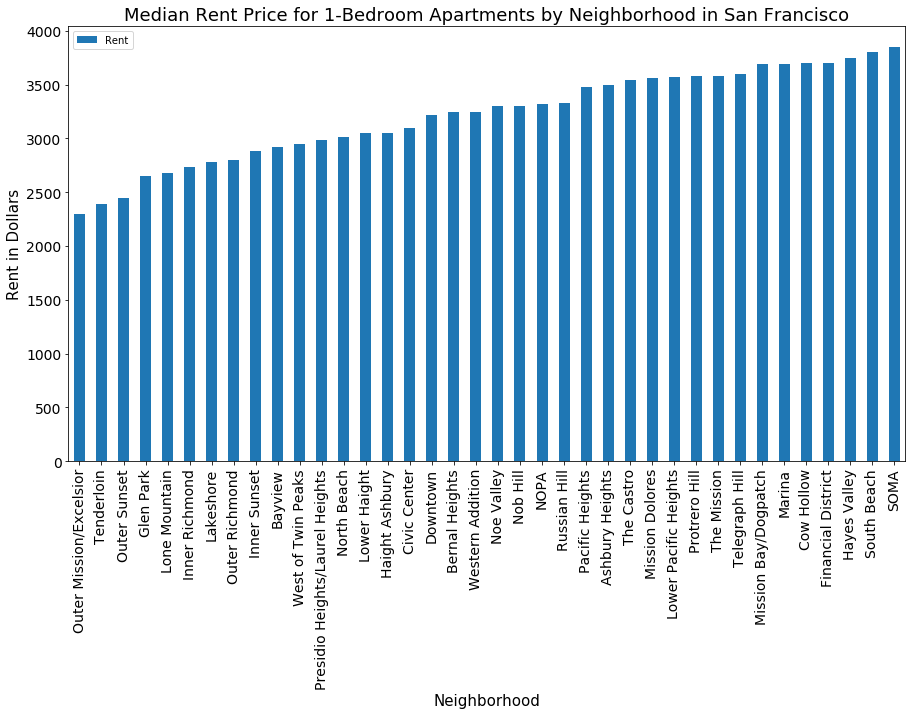

In [14]:
sf_rent_bar.plot(kind = 'bar', figsize = (15,8))

plt.title('Median Rent Price for 1-Bedroom Apartments by Neighborhood in San Francisco', fontsize = 18)
plt.ylabel('Rent in Dollars', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 15)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

In [15]:
manhattan_rent_bar = manhattan_rent
manhattan_rent_bar = manhattan_rent.set_index('Neighborhood')
manhattan_rent_bar.sort_values(['Rent'], ascending = True, axis = 0, inplace = True)
manhattan_rent_bar.head()

,Rent
Neighborhood,
Central Harlem,2025.0
East Harlem,2150.0
West Harlem,2200.0
East Village,2690.0
Upper East Side,2850.0


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

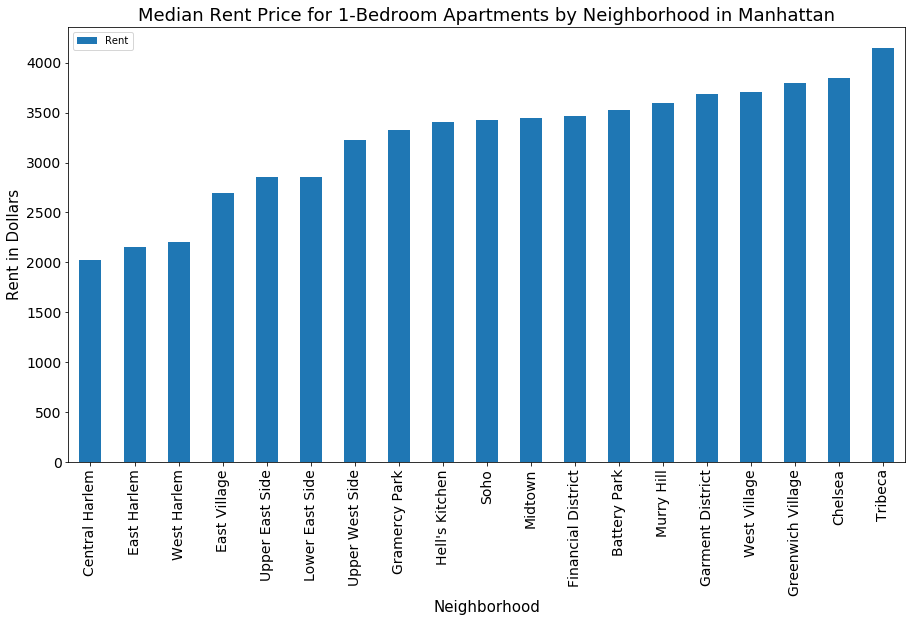

In [16]:
manhattan_rent_bar.plot(kind = 'bar', figsize = (15,8))

plt.title('Median Rent Price for 1-Bedroom Apartments by Neighborhood in Manhattan', fontsize = 18)
plt.ylabel('Rent in Dollars', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 15)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

### Comparing San Francisco and Manhattan
#### To do this, I need to join the two dataframes for use in the Results section

In [17]:
city_rents = sf_rent
city_rents = city_rents.drop(['Neighborhood'], axis = 1)
city_rents.head()

,Rent
0,2795.0
1,2450.0
2,2780.0
3,2730.0
4,2885.0


In [18]:
city_rents.columns = ['San Francisco']

In [19]:
city_rents.head()

,San Francisco
0,2795.0
1,2450.0
2,2780.0
3,2730.0
4,2885.0


In [20]:
city_rents['Manhattan'] = manhattan_rent['Rent']
city_rents.head()

,San Francisco,Manhattan
0,2795.0,2200.0
1,2450.0,2025.0
2,2780.0,2150.0
3,2730.0,3225.0
4,2885.0,2850.0


## 3.3 Generating City Maps
#### Using the location data for each neighborhood in each city, I generated a San Francisco and Manhattan city map with markers denoting the location of each neighborhood.

### San Francisco Map
#### Here I use the 'sf_data' dataframe because I want all the data columns

In [21]:
latitude = 37.7749 
longitude = -122.4194
# creating map of SF using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, neighborhood, rent in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood'], sf_data['Rent']):
    label = 'Neighborhood: {}, Median Rent: ${}'.format(neighborhood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)

map_sf

### Manhattan Map
#### Here I use the 'manhattan_data' dataframe because I want all the data columns

In [22]:
latitude = 40.7831 
longitude = -73.9712
# creating map of Manhattan using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, neighborhood, rent in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood'], manhattan_data['Rent']):
    label = 'Neighborhood: {}, Median Rent: ${}'.format(neighborhood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)

map_nyc

## 3.4 Neighborhood Analysis: One-Hot Encoding and K-means Clustering
#### Venue data is acquired using location data from each city’s dataframe.

In [23]:
CLIENT_ID = 'IW1DNBRJOUHECGXR0ST002ZPDJYOBCIRTROZZ5YJZFHCIP3Q' # your Foursquare ID
CLIENT_SECRET = 'TWMIYINYFXOLI0IGNPXXLCIRHFWLUNJ4VP2TJZXSJGUP2ZBN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IW1DNBRJOUHECGXR0ST002ZPDJYOBCIRTROZZ5YJZFHCIP3Q
CLIENT_SECRET:TWMIYINYFXOLI0IGNPXXLCIRHFWLUNJ4VP2TJZXSJGUP2ZBN


### 3.4.1 San Francisco Analysis
#### I will start by using the 'sf_location' dataframe

In [24]:
sf_location.head()

,Neighborhood,Latitude,Longitude
0,Outer Richmond,37.7777,-122.4953
1,Outer Sunset,37.7467,-122.4863
2,Lakeshore,37.7233,-122.4887
3,Inner Richmond,37.7810,-122.4654
4,Inner Sunset,37.7607,-122.4680


#### Here I create variables to use later on that reference specific information within the dataframe

In [25]:
neighborhood_latitude = sf_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = sf_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = sf_data.loc[0, 'Neighborhood'] # neighborhood name

#check..

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Outer Richmond are 37.7777, -122.4953.


#### I can request venue information from Foursquare. I requested the top 50 venues within 500 meters of each neighborhood center and received the resulting information in a JSON file with venue names, categories, location, etc.

In [26]:
# specify how many venues I want and within a certain radius of the neighborhood, I chose 100 venues, and a 500 meter radius
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IW1DNBRJOUHECGXR0ST002ZPDJYOBCIRTROZZ5YJZFHCIP3Q&client_secret=TWMIYINYFXOLI0IGNPXXLCIRHFWLUNJ4VP2TJZXSJGUP2ZBN&v=20180605&ll=37.7777,-122.4953&radius=500&limit=100'

#### First, I define a function that will extract information from the above JSON, clean it, and provide the relevant information needed of venues within each neighborhood

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now I write the code to run the above function on each neighborhood and create a new dataframe called 'sf_venues'.

In [28]:
sf_venues = getNearbyVenues(names=sf_data['Neighborhood'],
                                   latitudes=sf_data['Latitude'],
                                   longitudes=sf_data['Longitude']
                                  )


Outer Richmond
Outer Sunset
Lakeshore
Inner Richmond
Inner Sunset
West of Twin Peaks
Presidio Heights/Laurel Heights
Lone Mountain
NOPA
Haight Ashbury
Ashbury Heights
The Castro
Noe Valley
Glen Park
Outer Mission/Excelsior
Marina
Cow Hollow
Pacific Heights
Lower Pacific Heights
Western Addition
Lower Haight
Mission Dolores
Hayes Valley
North Beach
Russian Hill
Nob Hill
Downtown
Tenderloin
Civic Center
SOMA
The Mission
Bernal Heights
Telegraph Hill
Financial District
South Beach
Protrero Hill
Mission Bay/Dogpatch
Bayview


#### I check the shape and preview the data

In [29]:
print(sf_venues.shape)
sf_venues.head()

(2402, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Outer Richmond,37.7777,-122.4953,Simple Pleasures Cafe,37.775908,-122.495810,Café
1,Outer Richmond,37.7777,-122.4953,Cassava,37.775722,-122.496702,New American Restaurant
2,Outer Richmond,37.7777,-122.4953,Jiangnan Cuisine,37.775890,-122.495616,Chinese Restaurant
3,Outer Richmond,37.7777,-122.4953,Pacific Cafe,37.779782,-122.494428,Seafood Restaurant
4,Outer Richmond,37.7777,-122.4953,Mr. Bánh Mì,37.775700,-122.497491,Sandwich Place


#### Here I check how many venues were returned in each neighborhood

In [30]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ashbury Heights,36,36,36,36,36,36
Bayview,4,4,4,4,4,4
Bernal Heights,38,38,38,38,38,38
Civic Center,100,100,100,100,100,100
Cow Hollow,99,99,99,99,99,99
Downtown,100,100,100,100,100,100
Financial District,100,100,100,100,100,100
Glen Park,26,26,26,26,26,26
Haight Ashbury,91,91,91,91,91,91


### One-Hot Encoding: San Francisco
#### I will use this method to get the top five venues within each neighborhood

In [31]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Yoga Studio,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Racecourse,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Roller Rink,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Toy / G

#### Next, I'll group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [32]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped.head

<bound method NDFrame.head of                        Neighborhood  Yoga Studio  Acai House  \
0                   Ashbury Heights     0.000000        0.00   
1                           Bayview     0.000000        0.00   
2                    Bernal Heights     0.026316        0.00   
3                      Civic Center     0.000000        0.00   
4                        Cow Hollow     0.020202        0.00   
5                          Downtown     0.010000        0.00   
6                Financial District     0.010000        0.01   
7                         Glen Park     0.000000        0.00   
8                    Haight Ashbury     0.021978        0.00   
9                      Hayes Valley     0.010000        0.00   
10                   Inner Richmond     0.011628        0.00   
11                     Inner Sunset     0.022222        0.00   
12                        Lakeshore     0.000000        0.00   
13                    Lone Mountain     0.000000        0.00   
14        

#### Now I'll print each neighborhood with the top 5 most common venues

In [33]:
num_top_venues = 5

for hood in sf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ashbury Heights----
               venue  freq
0     Breakfast Spot  0.08
1        Bus Station  0.06
2  Convenience Store  0.06
3     Cosmetics Shop  0.06
4        Coffee Shop  0.06


----Bayview----
                     venue  freq
0                      Gym  0.25
1                  Brewery  0.25
2                    Trail  0.25
3                     Park  0.25
4  North Indian Restaurant  0.00


----Bernal Heights----
                venue  freq
0         Coffee Shop  0.08
1                Park  0.08
2  Italian Restaurant  0.05
3          Playground  0.05
4        Gourmet Shop  0.05


----Civic Center----
                   venue  freq
0  Vietnamese Restaurant  0.08
1        Thai Restaurant  0.06
2            Coffee Shop  0.05
3                Theater  0.04
4               Beer Bar  0.03


----Cow Hollow----
                 venue  freq
0   Italian Restaurant  0.06
1    French Restaurant  0.05
2             Wine Bar  0.04
3  American Restaurant  0.04
4       Cosmetics Shop  0.04



#### Then I'll put it into a new dataframe

In [34]:
#Here I define a function that will sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sf_hoods_venues_sorted = pd.DataFrame(columns=columns)
sf_hoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    sf_hoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

sf_hoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ashbury Heights,Breakfast Spot,Bus Station,Coffee Shop,Cosmetics Shop,Convenience Store,Pet Store,Sushi Restaurant,Bakery,Bar,Road
1,Bayview,Park,Brewery,Trail,Gym,Women's Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
2,Bernal Heights,Park,Coffee Shop,Trail,Italian Restaurant,Bakery,Gourmet Shop,Playground,Yoga Studio,Bus Stop,Butcher
3,Civic Center,Vietnamese Restaurant,Thai Restaurant,Coffee Shop,Theater,Beer Bar,Sandwich Place,American Restaurant,Music Venue,Vegetarian / Vegan Restaurant,Indian Restaurant
4,Cow Hollow,Italian Restaurant,French Restaurant,Cosmetics Shop,American Restaurant,Wine Bar,Thai Restaurant,Salad Place,Gym / Fitness Center,Mexican Restaurant,Juice Bar


### K-Means Clustering: San Francisco
#### I will use k-means clustering to assign each neighborhood to a cluster based on its most common venue type

In [36]:
# set number of clusters
kclusters = 10

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
sf_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
sf_kmeans.labels_[0:10] 

array([1, 4, 1, 0, 6, 6, 6, 1, 1, 6])

In [37]:
# add clustering labels
sf_hoods_venues_sorted.insert(0, 'Cluster Label', sf_kmeans.labels_)

sf_merged = sf_data

# merge sf_grouped with sf_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(sf_hoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head()

,Neighborhood,Rent,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Outer Richmond,2795.0,37.7777,-122.4953,7,Chinese Restaurant,Japanese Restaurant,Bakery,Café,Sporting Goods Shop,Vietnamese Restaurant,Sandwich Place,Pizza Place,Bar,Indie Movie Theater
1,Outer Sunset,2450.0,37.7467,-122.4863,5,Dumpling Restaurant,Chinese Restaurant,Japanese Restaurant,Toy / Game Store,Bubble Tea Shop,Café,Gastropub,Gym / Fitness Center,Korean Restaurant,Light Rail Station
2,Lakeshore,2780.0,37.7233,-122.4887,2,Golf Course,American Restaurant,Gym / Fitness Center,Gym,College Cafeteria,Park,Food Stand,Food Truck,French Restaurant,Food & Drink Shop
3,Inner Richmond,2730.0,37.7810,-122.4654,7,Japanese Restaurant,Sushi Restaurant,Bakery,Chinese Restaurant,Korean Restaurant,Vietnamese Restaurant,Thai Restaurant,Burmese Restaurant,Asian Restaurant,Bar
4,Inner Sunset,2885.0,37.7607,-122.4680,1,Ice Cream Shop,Chinese Restaurant,Art Gallery,Pizza Place,Bakery,Coffee Shop,Sandwich Place,Salad Place,Ramen Restaurant,Falafel Restaurant


In [39]:
sf_merged = sf_data

# merge sf_grouped with sf_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(sf_hoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#marker color was in the dataframe, had to remove it
sf_merged.drop(['marker_color'], axis=1, inplace=True)
sf_merged.head()

KeyError: "['marker_color'] not found in axis"

### 3.4.2 Manhattan Analysis
#### I will use the same methods used to analyze San Francisco

In [41]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

#check..

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of West Harlem are 40.8189, -73.9522.


#### Here I request another JSON, but for Manhattan

In [42]:
# specify how many venues I want and within a certain radius of the neighborhood, I chose 100 venues, and a 500 meter radius
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IW1DNBRJOUHECGXR0ST002ZPDJYOBCIRTROZZ5YJZFHCIP3Q&client_secret=TWMIYINYFXOLI0IGNPXXLCIRHFWLUNJ4VP2TJZXSJGUP2ZBN&v=20180605&ll=40.8189,-73.9522&radius=500&limit=100'

#### I then use the 'getNearbyVenues' function I defined early for the Manhattan venues

In [43]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

West Harlem
Central Harlem
East Harlem
Upper West Side
Upper East Side
Midtown
Hell's Kitchen
Garment District
Murry Hill
Chelsea
Gramercy Park
West Village
Greenwich Village
East Village
Soho
Lower East Side
Tribeca
Battery Park
Financial District


#### Then I get a count of how many venues are in each neighborhood

In [44]:
manhattan_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100
Chelsea,100,100,100,100,100,100
East Harlem,66,66,66,66,66,66
East Village,100,100,100,100,100,100
Financial District,100,100,100,100,100,100
Garment District,100,100,100,100,100,100
Gramercy Park,100,100,100,100,100,100
Greenwich Village,100,100,100,100,100,100


### One-Hot Encoding: Manhattan

In [45]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Outdoor Supply Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,West Harlem,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head

<bound method NDFrame.head of           Neighborhood  Accessories Store  African Restaurant  \
0         Battery Park               0.00                0.00   
1       Central Harlem               0.00                0.02   
2              Chelsea               0.00                0.00   
3          East Harlem               0.00                0.00   
4         East Village               0.00                0.00   
5   Financial District               0.01                0.00   
6     Garment District               0.00                0.00   
7        Gramercy Park               0.00                0.00   
8    Greenwich Village               0.01                0.00   
9       Hell's Kitchen               0.00                0.00   
10     Lower East Side               0.00                0.00   
11             Midtown               0.00                0.00   
12          Murry Hill               0.00                0.00   
13                Soho               0.01                0.0

In [47]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park----
           venue  freq
0    Coffee Shop  0.09
1           Park  0.09
2          Hotel  0.05
3  Memorial Site  0.04
4      Wine Shop  0.03


----Central Harlem----
                             venue  freq
0             Caribbean Restaurant  0.04
1  Southern / Soul Food Restaurant  0.04
2                   Cosmetics Shop  0.04
3                Mobile Phone Shop  0.04
4                   Clothing Store  0.04


----Chelsea----
                venue  freq
0         Art Gallery  0.27
1             Theater  0.03
2      Ice Cream Shop  0.03
3         Coffee Shop  0.03
4  Italian Restaurant  0.03


----East Harlem----
                venue  freq
0  Mexican Restaurant  0.09
1              Bakery  0.09
2         Pizza Place  0.08
3       Deli / Bodega  0.06
4            Pharmacy  0.05


----East Village----
                venue  freq
0        Cocktail Bar  0.07
1                 Bar  0.05
2            Wine Bar  0.04
3              Garden  0.03
4  Chinese Restaurant  0.03


-

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manhattan_hoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_hoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_hoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_hoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park,Coffee Shop,Park,Hotel,Memorial Site,Wine Shop,Italian Restaurant,Mexican Restaurant,Clothing Store,Plaza,Cupcake Shop
1,Central Harlem,Clothing Store,Southern / Soul Food Restaurant,Cosmetics Shop,Mobile Phone Shop,Caribbean Restaurant,Pizza Place,Bank,French Restaurant,Jazz Club,Kids Store
2,Chelsea,Art Gallery,Italian Restaurant,Ice Cream Shop,Coffee Shop,Theater,Tapas Restaurant,Wine Shop,Pizza Place,Gym / Fitness Center,American Restaurant
3,East Harlem,Bakery,Mexican Restaurant,Pizza Place,Deli / Bodega,Pharmacy,Italian Restaurant,Latin American Restaurant,Café,Video Game Store,Taco Place
4,East Village,Cocktail Bar,Bar,Wine Bar,Italian Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Garden,Chinese Restaurant,Vegetarian / Vegan Restaurant


### K-Means Clustering: Manhattan

In [49]:
# set number of clusters
kclusters = 10

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
manhattan_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
manhattan_kmeans.labels_[0:10] 

array([0, 3, 1, 2, 5, 0, 6, 7, 9, 7])

In [50]:
# add clustering labels
manhattan_hoods_venues_sorted.insert(0, 'Cluster Label', manhattan_kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(manhattan_hoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Neighborhood,Rent,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Harlem,2200.0,40.8189,-73.9522,4,Mexican Restaurant,Café,Pizza Place,Park,Sandwich Place,Chinese Restaurant,Pharmacy,Mobile Phone Shop,Sushi Restaurant,Mediterranean Restaurant
1,Central Harlem,2025.0,40.8089,-73.9482,3,Clothing Store,Southern / Soul Food Restaurant,Cosmetics Shop,Mobile Phone Shop,Caribbean Restaurant,Pizza Place,Bank,French Restaurant,Jazz Club,Kids Store
2,East Harlem,2150.0,40.7957,-73.9389,2,Bakery,Mexican Restaurant,Pizza Place,Deli / Bodega,Pharmacy,Italian Restaurant,Latin American Restaurant,Café,Video Game Store,Taco Place
3,Upper West Side,3225.0,40.7870,-73.9754,7,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Café,Mediterranean Restaurant,Indian Restaurant,Cosmetics Shop,Bakery,American Restaurant
4,Upper East Side,2850.0,40.7736,-73.9566,7,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Gym / Fitness Center,Mexican Restaurant,Bakery,Coffee Shop,Grocery Store,Ice Cream Shop,Yoga Studio


In [51]:
manhattan_merged.drop(['marker_color'], axis = 1, inplace = True)

KeyError: "['marker_color'] not found in axis"

# 4. Results <a name="results"></a>

## 4.1 Comparing Rent in San Francisco and Manhattan
#### Using the dataframe created in Methods 3.2, I will generate a box plot and summary statistics to compare rents in both cities.

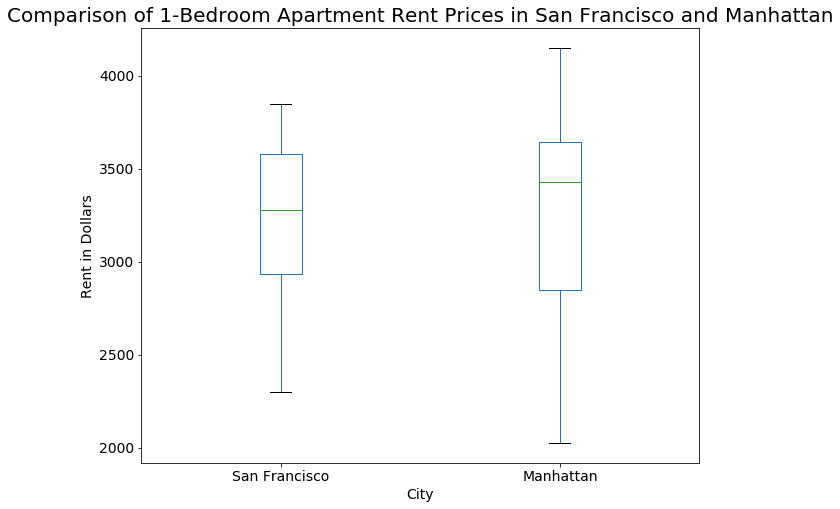

In [52]:
# now I'll generate the plot
city_rents.plot(kind = 'box', figsize = (10,8))
plt.title("Comparison of 1-Bedroom Apartment Rent Prices in San Francisco and Manhattan", fontsize = 20)
plt.ylabel("Rent in Dollars", fontsize = 14)
plt.xlabel("City", fontsize = 14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### Here I have the summary statistics to accompany the boxplot

In [ ]:
#run the describe method to get the summary statistics of the data
city_rents.describe()

## 4.2 Generating City Maps
#### After visualizing the general maps in Methods 3.3, I will alter the markers on each map to indicate neighborhoods with high (red), moderate (yellow), and low (green) cost of rent.

### San Francisco Rent Map

In [53]:
#location of San Francisco
latitude = 37.7749 
longitude = -122.4194

# creating map of SF using latitude and longitude values
sf_rent_map = folium.Map(location=[latitude, longitude], zoom_start=12.5)

#give markers colors based on rent values
sf_data['marker_color'] = pd.cut(sf_data['Rent'], bins=3, 
                              labels=['green', 'yellow', 'red'])

#adding colored markers to map
for index, row in sf_data.iterrows():
    folium.CircleMarker(
                    [row['Latitude'], row['Longitude']],
                    radius=10,
                    fill=True,
                    fill_opacity=0.7,
                    color=row['marker_color']).add_to(sf_rent_map)
    

# add markers with information labels to map
for lat, lng, neighborhood, rent in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood'], sf_data['Rent']):
    label = 'Neighborhood: {}, Median Rent: ${}'.format(neighborhood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'black',
        fill=True,
        fill_color= '00000',
        fill_opacity=1,
        parse_html=False).add_to(sf_rent_map) 
  
sf_rent_map

### Manhattan Rent Map

In [54]:
#manhattan location data
latitude = 40.7831 
longitude = -73.9712

# creating map of SF using latitude and longitude values
manhattan_rent_map = folium.Map(location=[latitude, longitude], zoom_start=12)

#give markers colors based on rent values
manhattan_data['marker_color'] = pd.cut(manhattan_data['Rent'], bins=3, 
                              labels=['green', 'yellow', 'red'])

#adding colored markers to map
for index, row in manhattan_data.iterrows():
    folium.CircleMarker(
                    [row['Latitude'], row['Longitude']],
                    radius=10,
                    fill=True,
                    fill_opacity=0.7,
                    color=row['marker_color']).add_to(manhattan_rent_map)
    

# add markers with information labels to map
for lat, lng, neighborhood, rent in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood'], manhattan_data['Rent']):
    label = 'Neighborhood: {}, Median Rent: ${}'.format(neighborhood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'black',
        fill=True,
        fill_color= '00000',
        fill_opacity=1,
        parse_html=False).add_to(manhattan_rent_map) 
  
manhattan_rent_map

## 4.3 Neighborhood Analysis

### 4.3.1 Most Common Venue Types

### San Francisco neighborhoods

In [55]:
sf_hoods_venues_sorted

,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Ashbury Heights,Breakfast Spot,Bus Station,Coffee Shop,Cosmetics Shop,Convenience Store,Pet Store,Sushi Restaurant,Bakery,Bar,Road
1,4,Bayview,Park,Brewery,Trail,Gym,Women's Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
2,1,Bernal Heights,Park,Coffee Shop,Trail,Italian Restaurant,Bakery,Gourmet Shop,Playground,Yoga Studio,Bus Stop,Butcher
3,0,Civic Center,Vietnamese Restaurant,Thai Restaurant,Coffee Shop,Theater,Beer Bar,Sandwich Place,American Restaurant,Music Venue,Vegetarian / Vegan Restaurant,Indian Restaurant
4,6,Cow Hollow,Italian Restaurant,French Restaurant,Cosmetics Shop,American Restaurant,Wine Bar,Thai Restaurant,Salad Place,Gym / Fitness Center,Mexican Restaurant,Juice Bar
5,6,Downtown,Hotel,Italian Restaurant,Café,American Restaurant,Bar,Breakfast Spot,Grocery Store,Beer Bar,Gym / Fitness Center,Cocktail Bar
6,6,Financial District,Coffee Shop,Café,Food Truck,Japanese Restaurant,New American Restaurant,Men's Store,Gym / Fitness Center,Sandwich Place,Restaurant,Italian Restaurant
7,1,Glen Park,Trail,Coffee Shop,Pizza Place,Scenic Lookout,Chinese Restaurant,Cheese Shop,Gym,Grocery Store,Sushi Restaurant,Library
8,1,Haight Ashbury,Boutique,Coffee Shop,Clothing Store,Shoe Store,Pizza Place,Gift Shop,Thai Restaurant,Bookstore,Breakfast Spot,Thrift / Vintage Store
9,6,Hayes Valley,Boutique,Wine Bar,Clothing Store,French Restaurant,Pizza Place,Furniture / Home Store,Sushi Restaurant,Optical Shop,New American Restaurant,Dessert Shop


### Manhattan neighborhoods

In [56]:
manhattan_hoods_venues_sorted

,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Battery Park,Coffee Shop,Park,Hotel,Memorial Site,Wine Shop,Italian Restaurant,Mexican Restaurant,Clothing Store,Plaza,Cupcake Shop
1,3,Central Harlem,Clothing Store,Southern / Soul Food Restaurant,Cosmetics Shop,Mobile Phone Shop,Caribbean Restaurant,Pizza Place,Bank,French Restaurant,Jazz Club,Kids Store
2,1,Chelsea,Art Gallery,Italian Restaurant,Ice Cream Shop,Coffee Shop,Theater,Tapas Restaurant,Wine Shop,Pizza Place,Gym / Fitness Center,American Restaurant
3,2,East Harlem,Bakery,Mexican Restaurant,Pizza Place,Deli / Bodega,Pharmacy,Italian Restaurant,Latin American Restaurant,Café,Video Game Store,Taco Place
4,5,East Village,Cocktail Bar,Bar,Wine Bar,Italian Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Garden,Chinese Restaurant,Vegetarian / Vegan Restaurant
5,0,Financial District,American Restaurant,Coffee Shop,Hotel,Juice Bar,Roof Deck,Pizza Place,Café,Mediterranean Restaurant,Spa,Falafel Restaurant
6,6,Garment District,Hotel,Theater,Coffee Shop,Burger Joint,Italian Restaurant,Bakery,Gym / Fitness Center,Pizza Place,Dance Studio,Mediterranean Restaurant
7,7,Gramercy Park,Italian Restaurant,American Restaurant,Wine Shop,Spa,Thrift / Vintage Store,Hotel,Mexican Restaurant,New American Restaurant,Coffee Shop,Pizza Place
8,9,Greenwich Village,Italian Restaurant,Jazz Club,Cosmetics Shop,American Restaurant,Coffee Shop,Pizza Place,New American Restaurant,Indian Restaurant,Ice Cream Shop,French Restaurant
9,7,Hell's Kitchen,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Theater,Wine Bar,Bakery,Coffee Shop,Ramen Restaurant,Pizza Place,Bar


### 4.3.2 Neighborhood Clusters and Maps

### San Francisco

In [57]:
#location of San Francisco
sf_latitude = 37.7749 
sf_longitude = -122.4194

# create map
sf_map_clusters = folium.Map(location=[sf_latitude, sf_longitude], zoom_start=12.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sf_map_clusters)
       
sf_map_clusters

### San Francisco Clusters
#### Here I outline the different clusters and assign their distinguishing feature

### Cluster 0: Breakfast & Outdoor Venues/Activities

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 0, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 1: Restaurants, Hotels, Shopping, Tourism

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 1, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 2: Monuments & Outdoor Activities/Venues

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 2, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 3: Fast Food and Recreation

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 3, sf_merged.columns[[0] + list(range(3, sf_merged.shape[1]))]]

### Cluster 4: Breweries and Restaurants

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 4, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 5: Golf and Shopping

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 5, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 6: Restaurants

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 6, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 7: Asian Restaurants and Shopping

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 7, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Cluster 8: Restaurants, Bars, Theater

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 8, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### CLuster 9: Restaurants and Markets

In [ ]:
sf_merged.loc[sf_merged['Cluster Label'] == 9, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

### Manhattan

In [58]:
#manhattan location data
m_latitude = 40.7831 
m_longitude = -73.9712

# create map
manhattan_map_clusters = folium.Map(location=[m_latitude, m_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(manhattan_map_clusters)
       
manhattan_map_clusters

### Manhattan Clusters
#### Here I outline the neighborhood clusters and assign them their distiguishing feature

### Cluster 0: Hotels, Restaurants, Coffee, Bars

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 0, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 1: Italian Food, Wine Bars

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 1, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 2: Art Galleries, Coffee Shops

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 2, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 3: Italian Food, Jazz Clubs, Bars

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 3, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 4: Hotels, Theaters, Coffee

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 4, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 5: Mexican Food, Pizza

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 5, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 6: Shopping

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 6, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 7: Restaurants, Fast Food, Bars

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 7, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 8: Restaurants

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 8, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

### Cluster 9: Restaurants and Coffee

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Label'] == 9, manhattan_merged.columns[[0] + list(range(5, manhattan_merged.shape[1]))]]

# 5. Discussion <a name="discussion"></a>

#### From the boxplot comparing rent, we can see that Manhattan has the highest and lowest prices when it comes to renting a 1-bedroom apartment. The median rent price for both cities are similar, however we can make the assertion that the least expensive apartments can by found in Manhattan. The rent maps and neighborhood bar charts can be used to determine the areas one may find a moderately priced apartment. If Used in conjunction with the neighborhood cluster data, one could weigh their options knowing what types of venues are in a neighborhood and if paying a little bit more in rent would be worth it.

#### Based on venue counts for each city and neighborhood, we see that Manhattan neighborhoods have the maximum number of venues in almost all neighborhoods expect the four least expensive ones. San Francisco had some neighborhoods where there were significantly less venues. However, Manhattan's rental price seemed to increase the closer to Downtown. While San Francisco's downtown had an even mix of moderate to expensive rent prices. 

#### Manhattan venues also clustered more uniformly compared to San Francisco, despite having fewer neighborhoods. San Francisco's Cluster 1 contained most of the neighborhoods within the city while many of the venues were quite different from each other.

#### For recommendations, I think it depends on the individuals interests. If someone wants quantity and is willing to pay more rent then Manhattan would be a better place to be. However, if someone is looking for something moderately priced they would have better luck in San Francisco. 

## 6. Conclusion <a name="conclusion"></a>

#### If looking at this study alone, I would say that Manhattan has more 'bang for your buck' because even the moderately prices neighborhoods had the maximum amount of venues. San Francisco has more opportunity to pay less in rent with slightly fewer venues. As stated before, the answer to the question of which city is better is still 'it depends.'